## GROUP 15:

### Satyaraj Reddy Nandi

### Aashrith Sangani

### Neha Samhitha Pinjala


---

### <center> NYC Airbnb Analysis: EDA + Price Prediction 🎲 </center>

---

<center><img src = "https://images.ctfassets.net/wrfb3hbaoyr0/53u5lL1hAQG4YmeagaKC6I/e871471524966764eb7a3456eef83591/hydrant_16-9.gif"></center>

---

### Abstract 

##### _Abstract overview of the notebook_

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

### Data Source

##### _Abstract overview of the notebook_

This dataset has around 49,000 observations in it with 16 features with a mix between categorical and numeric values.

### Importing the libraries

In [ ]:
#importing necessary libraries for further analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Loading the dataset

 

In [ ]:
#Using pandas library and 'read_csv' function to read the csv file
airbnb=pd.read_csv("AB_NYC_2019.csv")

#Examining the head of the data 
airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


#### Print the shape of the dataset
##### Let's see the number of rows & features of the dataset

In [ ]:
airbnb.shape

(48895, 16)

#### Let's print the datatypes of the dataset


In [ ]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

After loading the dataset in and from the head of AB_2019_NYC dataset we can see a number of things. These 16 feaures provide a very rich amount of information for deep data exploration we can do on this dataset. We do already see some missing values, which will require cleaning and handling of NaN values. Later, we may need to continue with mapping certain values to ones and zeros for predictive analytics.

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Check statistics of the dataset

In [ ]:
airbnb.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


We see that the average price is around ~152. Price varies between 0 to 10K.

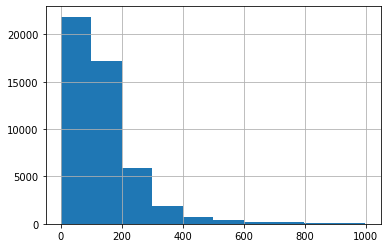

In [ ]:
### Lets plot histogram for prices less than $1000
hist_price1=airbnb["price"][airbnb["price"]<1000].hist()

Handling outliers by removing entries having price > 1000

In [ ]:
airbnb = airbnb[airbnb["price"]<1000]
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Let's remove the duplicates if any.


In [ ]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

0

In [ ]:
airbnb.shape

(48597, 16)

#### Let's check for the null values in each column

In [ ]:
airbnb.isnull().sum()

id                                   0
name                                16
host_id                              0
host_name                           21
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9891
reviews_per_month                 9891
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In our case, missing data that is observed does not need too much special treatment. Looking into the nature of our dataset we can state further things: columns 'name','id','host_name','last_review' are irrelevant and insignificant to our data analysis,  Therefore, let's proceed with removing columns that are not important to us.

In [ ]:
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
airbnb.dropna(how = 'any', inplace = True)

#### Let's examine the changes after dropping the unnecessary columns


In [ ]:
airbnb.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


For "review_per_month" column we can simply append it with 0.0 for missing values; we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews there will be 0.0 rate of reviews per month. 

In [ ]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)

#Examining the changes
airbnb.reviews_per_month.isnull().sum()

0

#### Remove the NaN values from the dataset

In [ ]:
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info() 

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38706 entries, 0 to 48852
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         38706 non-null  int64  
 1   neighbourhood_group             38706 non-null  object 
 2   neighbourhood                   38706 non-null  object 
 3   latitude                        38706 non-null  float64
 4   longitude                       38706 non-null  float64
 5   room_type                       38706 non-null  object 
 6   price                           38706 non-null  int64  
 7   minimum_nights                  38706 non-null  int64  
 8   number_of_reviews               38706 non-null  int64  
 9   reviews_per_month               38706 non-null  float64
 10  calculated_host_listings_count  38706 non-null  int64  
 11  availability_365                38706 non-null  int64  
dtypes: float64(3), int64(6), object(

### Print all the columns names

In [ ]:
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
#let's proceed with examining some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

These are the different unique neighbourhoods in the 4 different neighbourhood groups including Brooklyn, Manhattan, Queens, Staten Islands, Bronx.

In [ ]:
#examining the unique values of room_type as this column will appear very handy for later analysis
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

### Let's plot the neighbourhood groups to get a better understading of the popularity of the neighbourhood groups.

Text(0.5, 1.0, 'Neighbourhood Group')

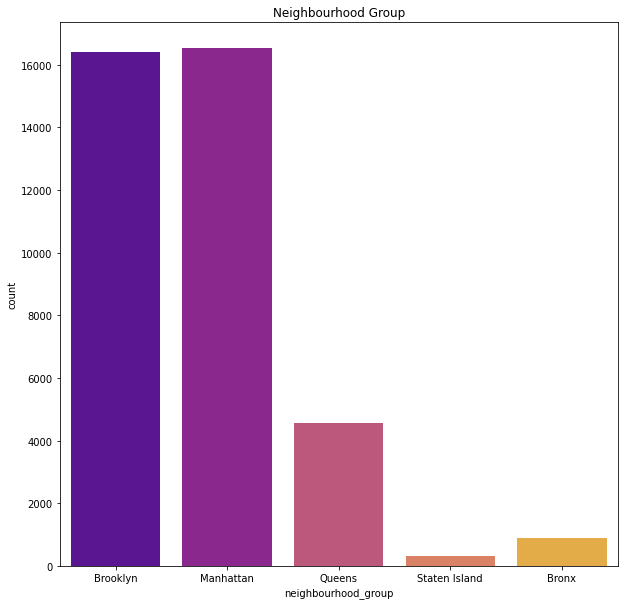

In [ ]:
sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

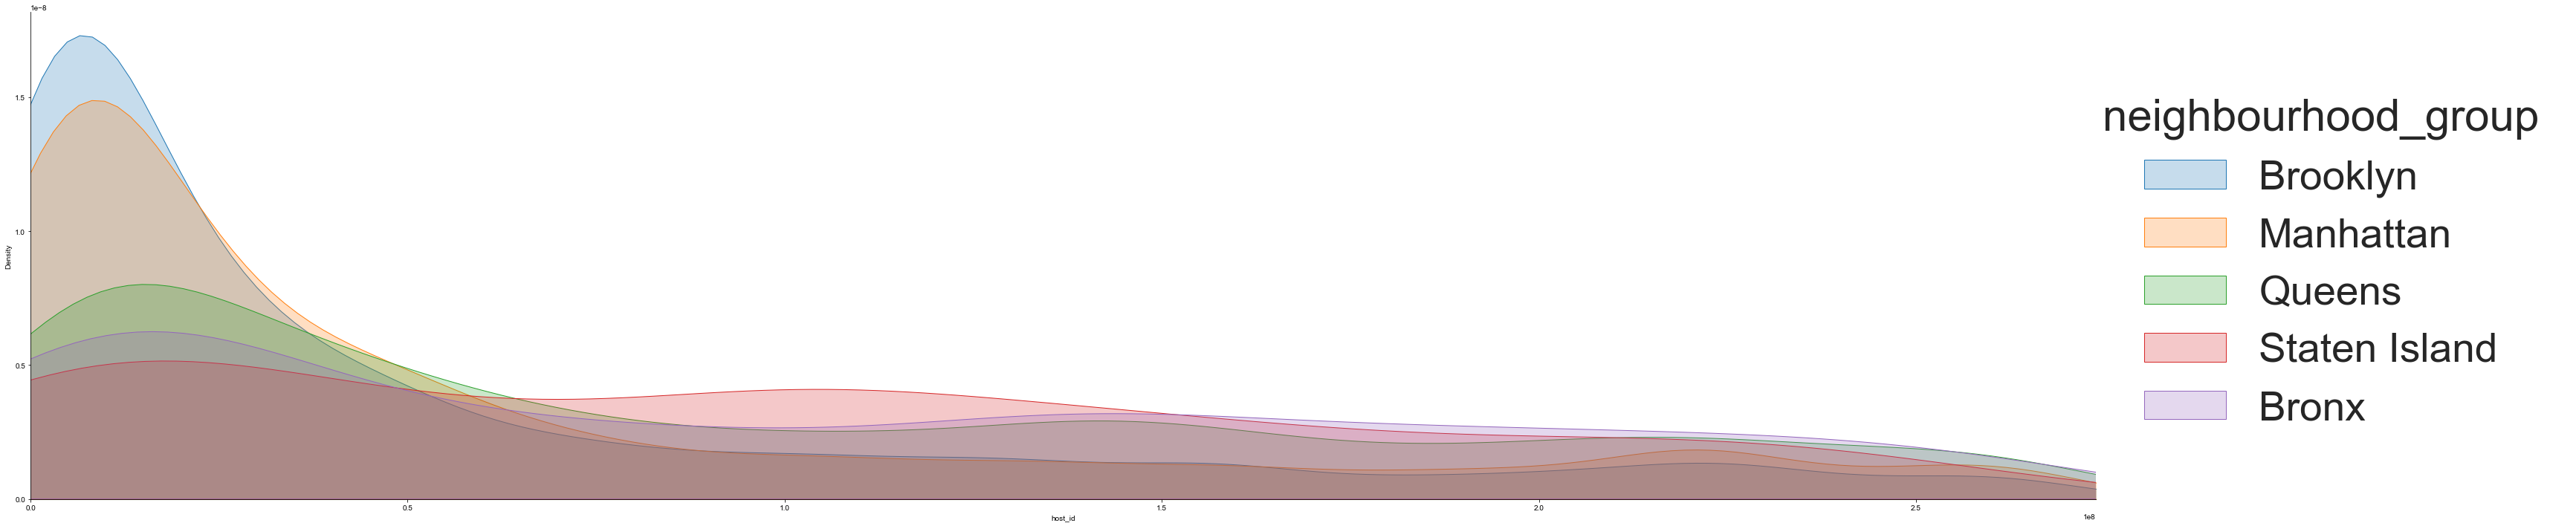

In [ ]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(airbnb, hue="neighbourhood_group", aspect=4, height=10)
fig.map(sns.kdeplot, 'host_id', shade=True)
oldest = airbnb['host_id'].max()
fig.set(xlim=(0, oldest))
sns.set(font_scale=5)
fig.add_legend()

### Let's plot the room types to know which ones are more prevalent.

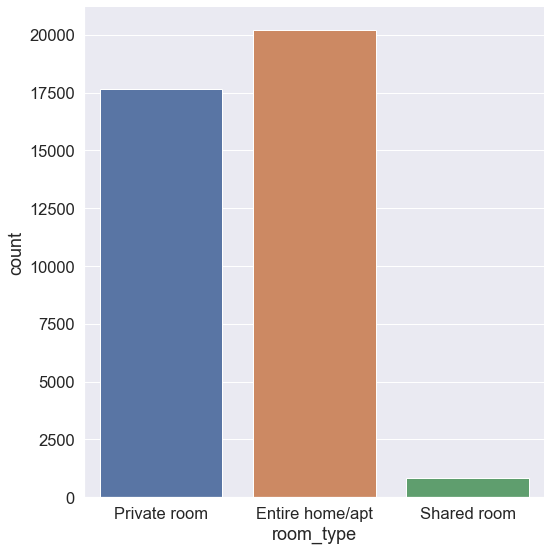

In [ ]:
sns.set(font_scale=1.5)
sns.catplot("room_type", data=airbnb, kind="count", height=8)

### We have another feature called 'Neigbourhood' in our dataset. Let's plot the most popular neighbourhood area in terms of the AirBnB hostings there.

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Most Popular Neighbourhood')

Text(0, 0.5, 'Neighbourhood Area')

Text(0.5, 0, 'No. of guys who host in this area ')

<BarContainer object of 10 artists>

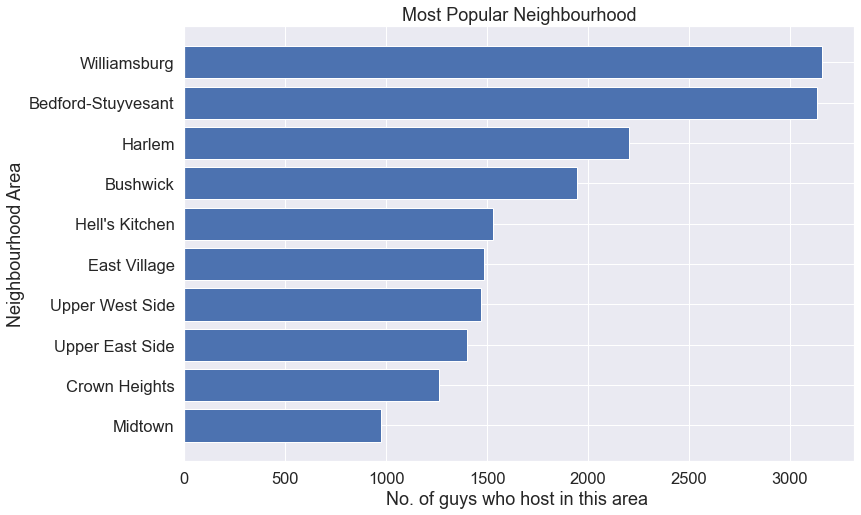

In [ ]:
data = airbnb.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("No. of guys who host in this area ")

plt.barh(x, y)

As you can see, Williamsburg & Bedford seem to be a popular destination for the hosts.

### Map of Neighbourhood group

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

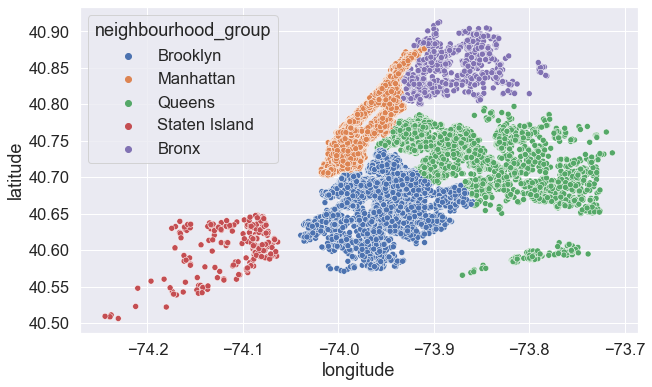

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.ioff()

### Availability of Room

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

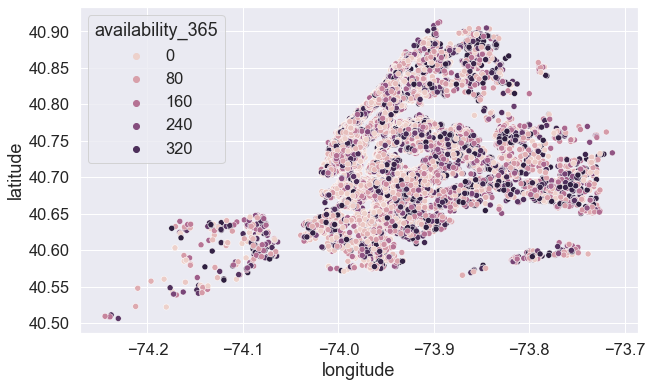

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()

### Let's see which of the hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service

In [ ]:
top_host=airbnb.host_id.value_counts().head(10)
top_host

219517861    207
61391963      79
16098958      61
137358866     51
7503643       49
190921808     46
30283594      43
1475015       42
120762452     40
2119276       39
Name: host_id, dtype: int64

In [ ]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [ ]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,207
1,61391963,79
2,16098958,61
3,137358866,51
4,7503643,49
5,190921808,46
6,30283594,43
7,1475015,42
8,120762452,40
9,2119276,39


Text(0.5, 1.0, 'Hosts with the most listings in NYC')

Text(0, 0.5, 'Count of listings')

Text(0.5, 0, 'Host IDs')

[Text(0, 0, '1475015'),
 Text(1, 0, '2119276'),
 Text(2, 0, '7503643'),
 Text(3, 0, '16098958'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '120762452'),
 Text(7, 0, '137358866'),
 Text(8, 0, '190921808'),
 Text(9, 0, '219517861')]

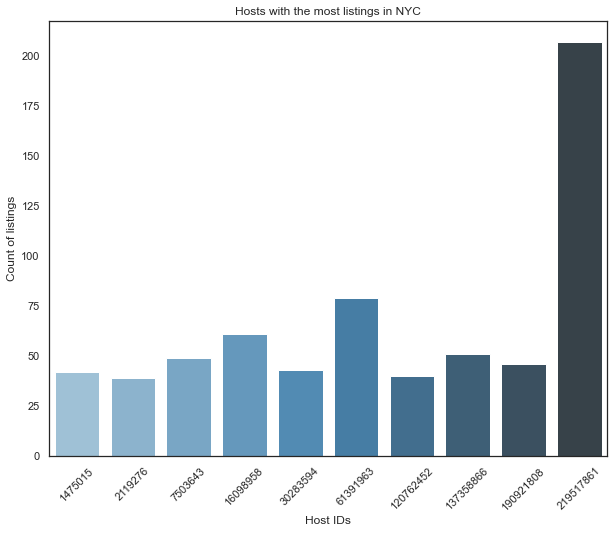

In [ ]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

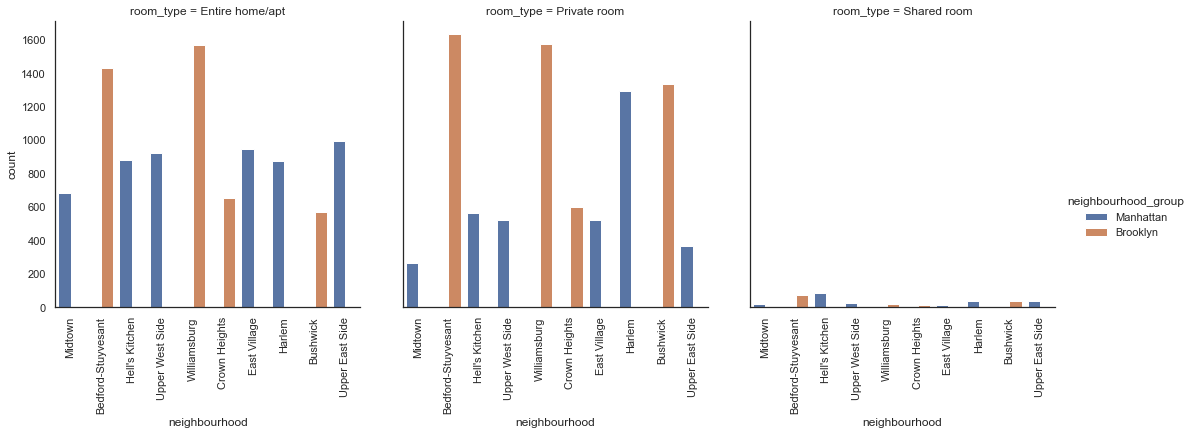

In [ ]:

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

Let's breakdown on what we can see from this plot. First, we can see that our plot consists of 3 subplots - that is the power of using catplot; with such output, we can easily proceed with comparing distributions among interesting attributes. Y-axis represents a count of observations and X-axis observations we want to count. However, there are 2 more important elements: column and hue; those 2 differentiate subplots. After we specify the column and determined hue we are able to observe and compare our Y and X axes among specified column as well as color-coded. So, what do we learn from this? The observation that is definitely contrasted the most is that 'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods. Then, we can see that for these 10 neighborhoods only 2 boroughs are represented: Manhattan and Brooklyn; that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations, therefore would have the most listing availability. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

### Let's do a fun word cloud analysis on the data.

(<Figure size 1800x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1bb282ae10>)

(-0.5, 1919.5, 1079.5, -0.5)

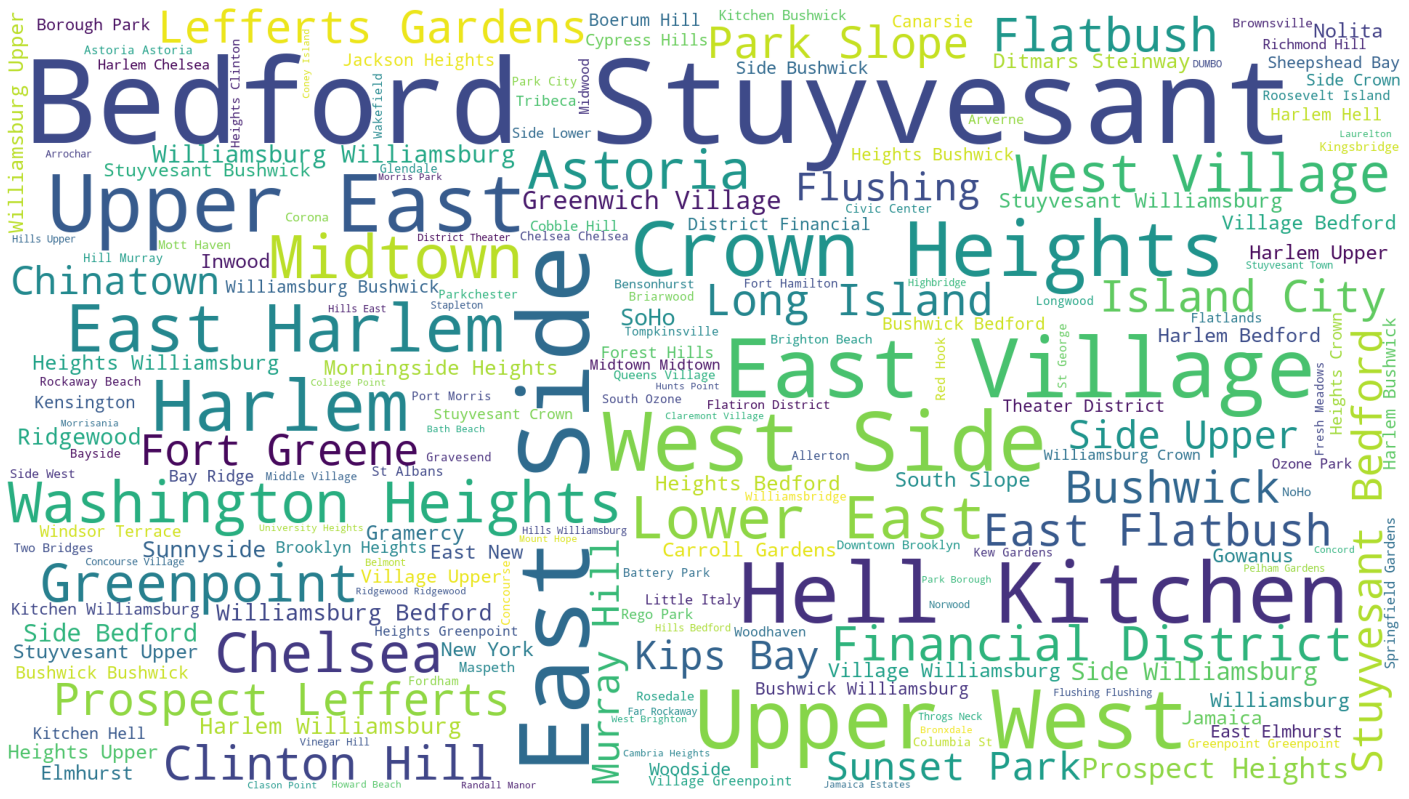

In [ ]:
from wordcloud import WordCloud

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [ ]:
#let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

#initializing empty list where we are going to put our name strings

airbnb_words =pd.read_csv("AB_NYC_2019.csv")
_names_=[]
#getting name strings from the column and appending it to the list
for name in airbnb_words.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [ ]:
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [ ]:
#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

Text(0.5, 1.0, 'Counts of the top 25 used words for listing names')

Text(0, 0.5, 'Count of words')

Text(0.5, 0, 'Words')

[Text(0, 0, 'in'),
 Text(1, 0, 'room'),
 Text(2, 0, 'bedroom'),
 Text(3, 0, 'private'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'cozy'),
 Text(6, 0, 'the'),
 Text(7, 0, 'to'),
 Text(8, 0, 'studio'),
 Text(9, 0, 'brooklyn'),
 Text(10, 0, 'apt'),
 Text(11, 0, 'spacious'),
 Text(12, 0, '1'),
 Text(13, 0, 'with'),
 Text(14, 0, '2'),
 Text(15, 0, 'of'),
 Text(16, 0, 'east'),
 Text(17, 0, 'and'),
 Text(18, 0, 'manhattan'),
 Text(19, 0, '&'),
 Text(20, 0, 'park'),
 Text(21, 0, 'sunny'),
 Text(22, 0, 'beautiful'),
 Text(23, 0, 'near'),
 Text(24, 0, 'williamsburg')]

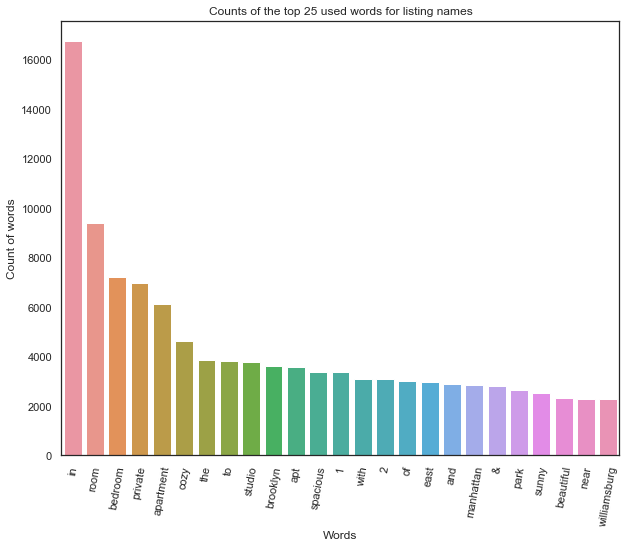

In [ ]:
#we are going to use barplot for this visualization
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

We can observe that finding out and going over top 25 used listings' name words - we are able to see one clear trend. It shows that hosts are simply describing their listing in a short form with very specific terms for easier search by a potential traveler. Such words used by the hosts are 'room', 'bedroom', 'private', 'apartment', 'studio'. This shows that there are no catchphrases or 'popular/trending' terms that are used for names; hosts use very simple terms describing the space and the area where the listing is. This technique was somewhat expected as dealing with multilingual customers can be tricky and you definitely want to describe your space in a concise and understood form as much as possible.

In [ ]:
#last column before we move on to building models is, 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=airbnb_words.nlargest(10,'number_of_reviews')
top_reviewed_listings.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342


We can observe the most popular AirBnB places hosted in NYC according to the number of reviews. 

### Let's display the correlation between different variables

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:>

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

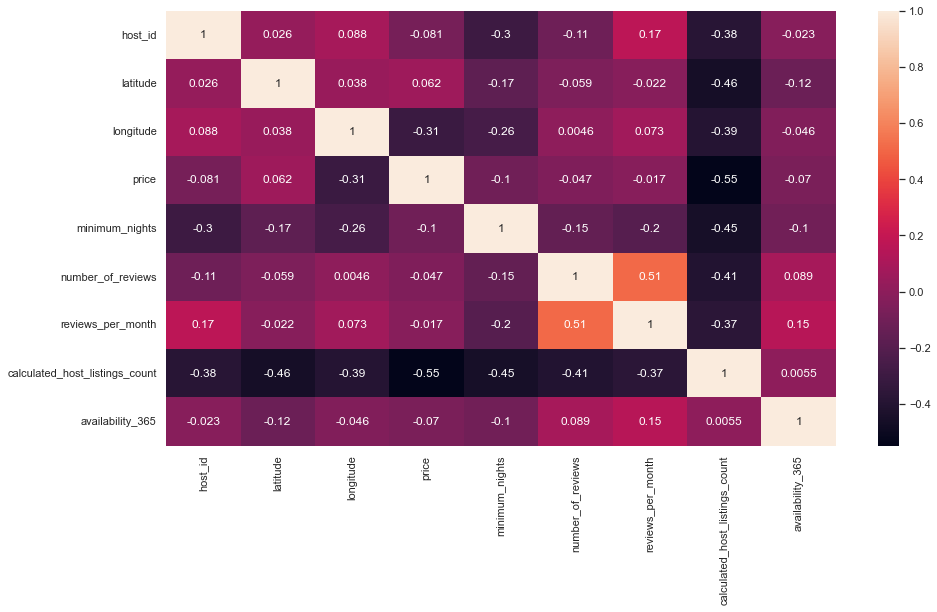

In [ ]:
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb.columns

Our features are not coorelated.

In [ ]:
airbnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


### Splitting the data into Independent & Dependent variables

In [ ]:
airbnb.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis = 1, inplace = True)
X = airbnb.iloc[:,[0,1,3,4,5]] #Independent variable
y = airbnb['price'] #Dependent variable

### Label encoding

In [ ]:
#Label encoding
X = pd.get_dummies(X, prefix=['neighbourhood_group', 'room_type'], drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### Splitting The Dataset Into Training & Validation Set

In [ ]:
#splitting the dataset into test and training data
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

In [ ]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (30964, 9)
Dimensions of the training target vector: (30964,)
Dimensions of the test feature matrix: (7742, 9)
Dimensions of the test target vector: (7742,)


#### From the dataset we can see that the values are very high so we need to scale down the values so we will be scaling down the values with the help of Standard Scaler

### Feature scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Model building

#### Applying Linear Regression Algorithm: 

LinearRegression()

R2 score:  31.882098178938435
RMSE:  85.84813202026169
   Actual Values  Predicted Values
0             65         81.342280
1             89         98.963540
2             97         49.735980
3            165        155.162219
4             45         57.707703


<AxesSubplot:>

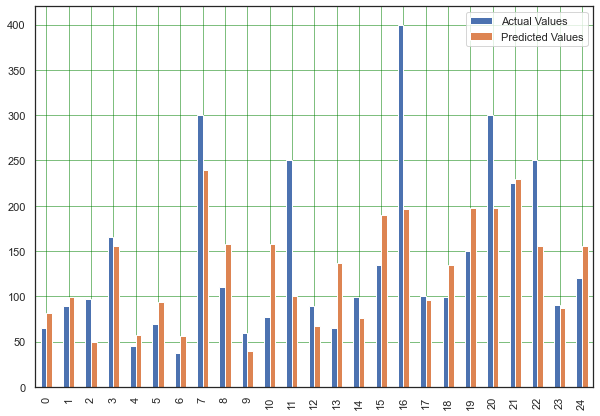

In [ ]:
#Prepare a Linear Regression Model

reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
#R2 score
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score: ",r2_score(y_test,y_pred)*100)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Applying Lasso Regression: 

Lasso(alpha=0.01)

R2 score:  31.88252050108097
RMSE:  85.84786589621592
   Actual Values  Predicted Values
0             65         81.282451
1             89         98.978543
2             97         49.711175
3            165        155.155025
4             45         57.717940


<AxesSubplot:>

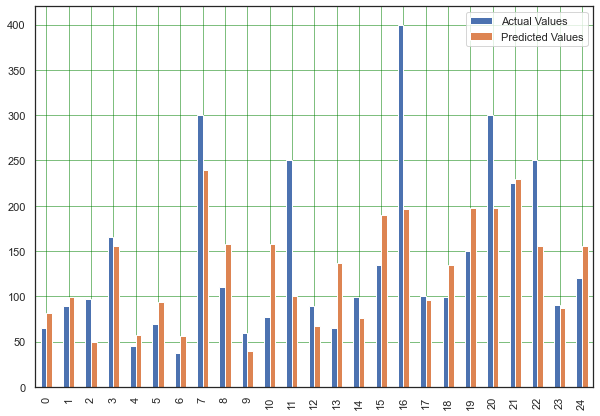

In [ ]:
#Lasso regression
regL1 = Lasso(alpha=0.01)
regL1.fit(X_train, y_train) 

y_pred=regL1.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,y_pred)*100)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Applying Gradient Boosting Regressor: 

GradientBoostingRegressor(learning_rate=0.01, n_estimators=3000)

R2 score:  36.656876311016404
RMSE:  82.78467663449844
   Actual Values  Predicted Values
0             65         79.586269
1             89         90.904027
2             97         63.154291
3            165        158.611808
4             45         68.104105


<AxesSubplot:>

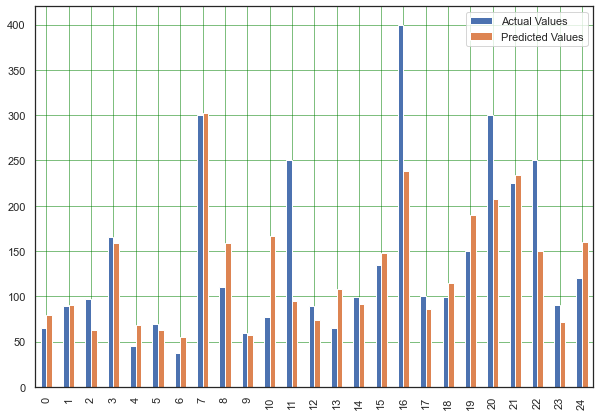

In [ ]:
#Gradient Boosting Regressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

y_pred=GBoost.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,y_pred)*100)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor
import plotly.express as px
import urllib

def AlgoFun (X_train, Y_train, X_test, Y_test, Algo, Result):
    
    if (Algo == 'LOG'):
        log_reg=LogisticRegression(C=1000,max_iter=50000)
        log_reg.fit(X_train, Y_train)
        Y_pred = log_reg.predict(X_test)
        
    elif (Algo == 'LIN'):
        model = linear_model.LinearRegression()
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        
    elif (Algo == 'KNN'):
        KNN=KNeighborsClassifier(n_neighbors=20)
        KNN.fit(X_train, Y_train)
        Y_pred=KNN.predict(X_test)

    elif (Algo == 'RFC'):
        Clf =  RandomForestClassifier(n_estimators = 500, n_jobs = -1)
        Clf.fit(X_train, Y_train)
        Y_pred=Clf.predict(X_test) 
        compare1 = pd.DataFrame()
        compare1[0] = Clf.feature_importances_
        compare1[1] = X_test.columns
        print('Feature importance: ')
        print(compare1.sort_values(by=0,ascending= False))
        
    elif (Algo == 'NN'):
        NN = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000)
        NN.fit(X_train, Y_train)
        Y_pred = NN.predict(X_test)
        
    elif (Algo == 'DTR'):
        DTR = tree.DecisionTreeClassifier()
        DTR.fit(X_train, Y_train)
        Y_pred=DTR.predict(X_test)
        
    elif (Algo == 'GSCV'):
        estimator = RandomForestRegressor(random_state = 42,criterion='mse')
        para_grids = {
                    "n_estimators" : [10,50,100],
                    "max_features" : ["auto", "log2", "sqrt"],
                    'max_depth' : [4,5,6,7,8,9,15],
                    "bootstrap"    : [True, False]
                }
        Grid = GridSearchCV(estimator, para_grids,cv= 5)
        Grid.fit(X_train, Y_train)
        best_param = Grid.best_estimator_
        print(best_param)
        Y_pred = best_param.predict(X_test)

        
    elif (Algo == 'RFR'):
        # Using the best model from Grid Serach CV
        model = RandomForestRegressor(bootstrap=False, max_depth=15, max_features='log2',n_estimators=50, random_state=42)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
      
    elif (Algo == 'GBR'):   
        GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
        GBR.fit(X_train, Y_train)
        Y_pred = GBR.predict(X_test)
        
    elif (Algo == 'GNB'):   
        GNB = GaussianNB()
        GNB.fit(X_train, Y_train)
        Y_pred = GNB.predict(X_test)
      
    elif (Algo == 'ADA'):
        model = AdaBoostRegressor(random_state=0, n_estimators=100)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        
    elif (Algo == 'XGB'):
        model = XGBRegressor()
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)      
        
    elif (Algo == 'SVM'):
        model = svm.SVC(kernel='linear') # Linear Kernel
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)       
            
    else:
        print("Wrong Algo")
        
    ActVPred = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
    print(ActVPred)

    #Checking the accuracy
    print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

    if (Result == 'Binary'):
        Count_row = []
        Visual_rep = []

        index = 0
        for i, row in ActVPred.iterrows():
            if (row['Predicted'] < 0.5):
                Visual_rep.append(0)
            else:
                Visual_rep.append(1)

            if (row['Actual'] < 1):
                if (row['Predicted'] < 0.5):
                    Count_row.append(1)
                else:
                    Count_row.append(0)
            else:
                if (row['Predicted'] >= 0.5):
                    Count_row.append(1)
                else:
                    Count_row.append(0)
            index = index + 1

        print('--------------------------------------------------------------------------')
        print(Algo)
        print('Model accruracy scores: {:.3f}'.format(Count_row.count(1)/index))


        ax = plt.subplots(figsize=(10, 10))
        ax = sns.heatmap(confusion_matrix(Visual_rep,Y_test),annot=True,cmap='coolwarm',fmt='d')
        ax.set_title('Prediction vs Original Data (Confusion Matrix)',fontsize=18)
        ax.set_xticklabels(['Actual 0','Actual 1'],fontsize=18)
        ax.set_yticklabels(['Predicted 0','Predicted 1'],fontsize=18)

        filename = 'ConfusionMatrix.jpg'
        plt.savefig(Algo + " " + filename)
        plt.show()
    
    elif (Result == 'Analog'):
        fig, ax = plt.subplots()
        minimum = min (Y_test.min(), Y_pred.min())
        maximum = max (Y_test.max(), Y_pred.max())
        ax.scatter(Y_test, Y_pred)
        ax.plot([minimum, maximum], [minimum, maximum], 'k--', lw=4)
        ax.set_xlabel('Measured')
        ax.set_ylabel('Predicted')
        filename = 'Result Plot.jpg'
        plt.savefig(Algo + " " + filename)
        plt.show()
    
    else:
        print("Wrong parameter")

    return (ActVPred)

In [ ]:
airbnb_model = pd.read_csv("AB_NYC_2019.csv")

In [ ]:
airbnb_model['room_type'] = airbnb_model['room_type'].astype("category").cat.codes
airbnb_model['neighbourhood'] = airbnb_model['neighbourhood'].astype("category").cat.codes
airbnb_model['neighbourhood_group']= airbnb_model['neighbourhood_group'].astype("category").cat.codes
airbnb_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  int8   
 5   neighbourhood                   48895 non-null  int16  
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  int8   
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# 5. Removing the price skeweness by using log

<Figure size 864x720 with 0 Axes>

<AxesSubplot:xlabel='price_log', ylabel='Density'>

Text(0.5, 1.0, 'Log-Price Distribution Plot')

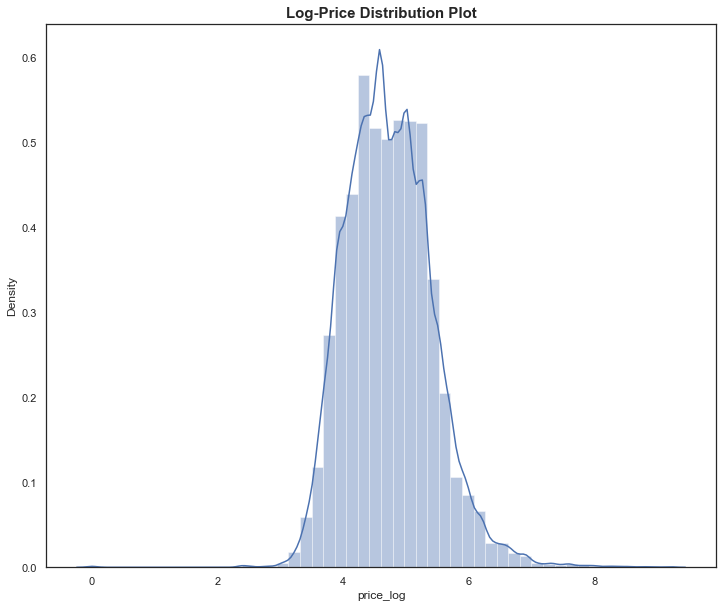

In [ ]:
airbnb_model['price_log'] = np.log(airbnb_model.price+1)

plt.figure(figsize=(12,10))
sns.distplot(airbnb_model['price_log'])
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

((array([-4.18631264, -3.98032736, -3.86801681, ...,  3.86801681,
          3.98032736,  4.18631264]),
  array([0.        , 0.        , 0.        , ..., 9.21044037, 9.21044037,
         9.21044037])),
 (0.6871218845318134, 4.736884710386776, 0.9881016272577379))

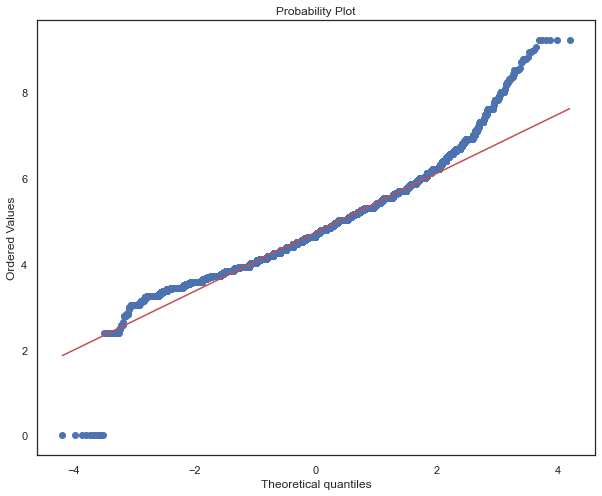

In [ ]:
stats.probplot(airbnb_model['price_log'], plot=plt)
plt.show()

In below graph, the good fit indicates that normality is a reasonable approximation.

# 6. Removing all unnecesaary data

In [ ]:
airbnb_model1 = airbnb_model.drop(columns=['name','id' ,'host_id','host_name', 'last_review','price'])
airbnb_model1.fillna(airbnb_model1.mean(), inplace=True)
airbnb_model1.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

# 7. Checking for correlation among factors and key contributors to price

Key contributers to price is room_type and longitude. 
Properties centrally located have higher price variance. Properties located up North and down South are mostly cheaper

Next set of equally important pair is number of reviews and reviews per month. 
So how famous the listing is also effects price. Looks like mid priced (4-6 in log price) hotels tend to have larger reviews

Last but not the leat is minimum_nights. Listings with more nights tend to be mid priced (4-6 in log price) hotels.

<Figure size 1080x864 with 0 Axes>

[(11.0, 0.0)]

Text(0.5, 1.0, 'Correlation Matrix')

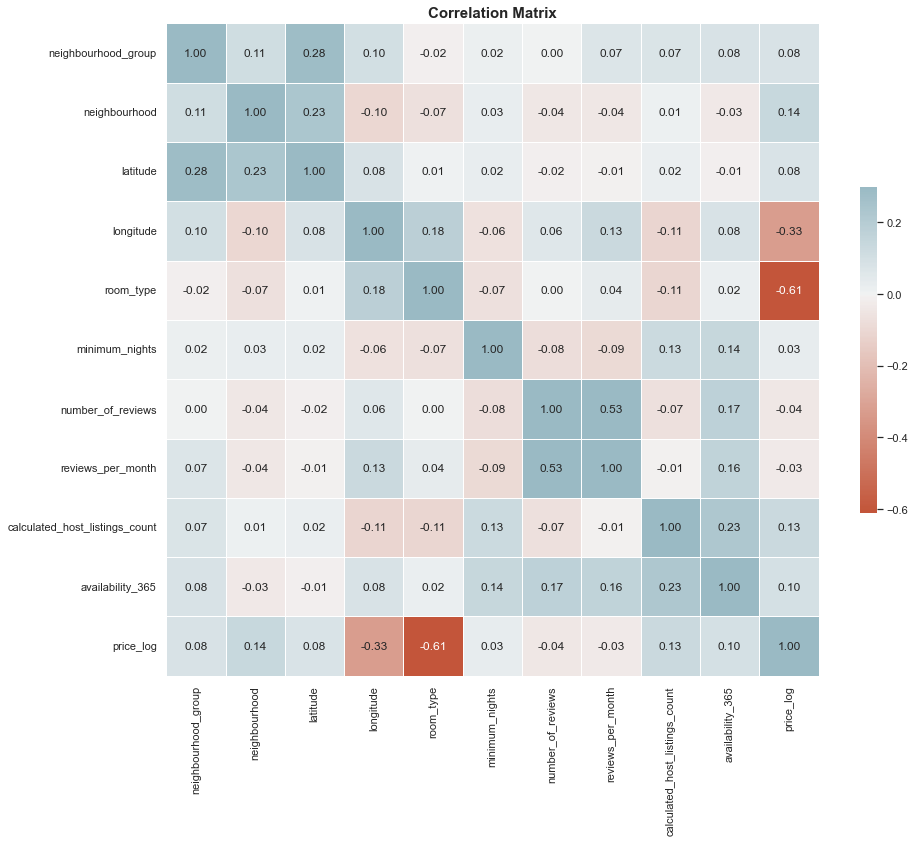

In [ ]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=airbnb_model1.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

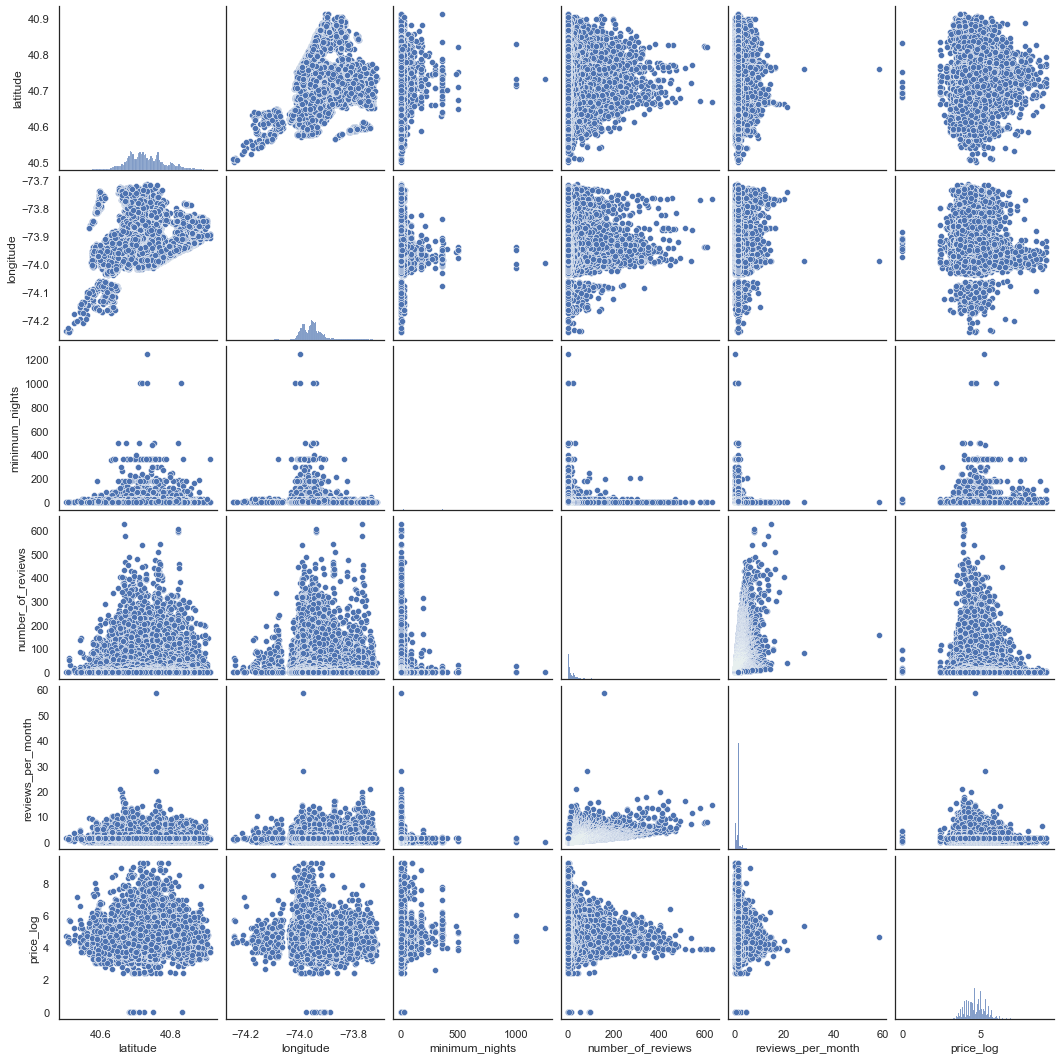

In [ ]:
hpi_df = airbnb_model1[['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','price_log']]
sns.pairplot(hpi_df)

# 9. Multicollinearity
Multicollinearity will help to measure the relationship between explanatory variables in multiple regression. 
If there is multicollinearity, these highly related input variables should be eliminated from the model.

Not one of the eigenvalues of the correlation matrix is close to zero. It means that there is no multicollinearity in the data.

In [ ]:
#Eigen vector of a correlation matrix.
multicollinearity, V=np.linalg.eig(corr)
multicollinearity

array([1.94766095, 1.64337523, 1.41516454, 1.26383356, 0.32595472,
       0.46300457, 0.66853039, 0.70054096, 0.76213034, 0.93539909,
       0.87440567])

# 10. Normalizing the data 

Standard Scaler technique will be used to normalize the data set. Thus, each feature has 0 mean and 1 standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
nyc_model_x, nyc_model_y = airbnb_model1.iloc[:,:-1], airbnb_model1.iloc[:,-1]
nyc_model_x = scaler.fit_transform(nyc_model_x)

In [ ]:
X_train, X_test, Y_train, Y_test  = train_test_split(nyc_model_x, nyc_model_y, test_size=0.3,random_state=42)

# 11. Save cleaned Data

In [ ]:
pd.DataFrame(X_train).to_csv('X_train.csv')
pd.DataFrame(X_test).to_csv('X_test.csv')

pd.DataFrame(Y_train).to_csv('Y_train.csv')
pd.DataFrame(Y_test).to_csv('Y_test.csv')

# 12. Load Cleaned Data

In [ ]:
X_train = pd.read_csv('./X_train.csv')
X_test = pd.read_csv('./X_test.csv')
Y_train = pd.read_csv('./Y_train.csv').to_numpy()[:,1]
Y_test = pd.read_csv('./Y_test.csv').to_numpy()[:,1]

# 13. XG Boost

         Actual  Predicted
0      4.499810   4.729705
1      3.433987   3.696195
2      4.795791   4.624278
3      6.154858   5.993853
4      5.298317   5.088271
...         ...        ...
14664  4.189655   4.588406
14665  4.025352   4.429927
14666  4.510860   4.536265
14667  4.564348   4.510631
14668  4.584967   5.092083

[14669 rows x 2 columns]
Mean Absolute Error: 0.31270291116667387
Mean Squared Error: 0.18785166496824524
Root Mean Squared Error: 0.43341857939899764


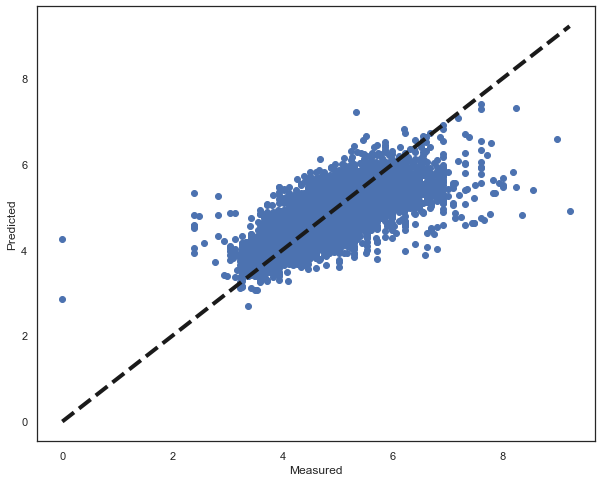

In [ ]:
ActVPred = AlgoFun (X_train, Y_train, X_test, Y_test, 'XGB', 'Analog')

# 15. Random Forest Regression

         Actual  Predicted
0      4.499810   4.756433
1      3.433987   4.001693
2      4.795791   4.732587
3      6.154858   5.618991
4      5.298317   4.890826
...         ...        ...
14664  4.189655   4.520680
14665  4.025352   4.503067
14666  4.510860   4.440616
14667  4.564348   4.581179
14668  4.584967   5.130538

[14669 rows x 2 columns]
Mean Absolute Error: 0.3045703741591595
Mean Squared Error: 0.18171172821997533
Root Mean Squared Error: 0.426276586525668


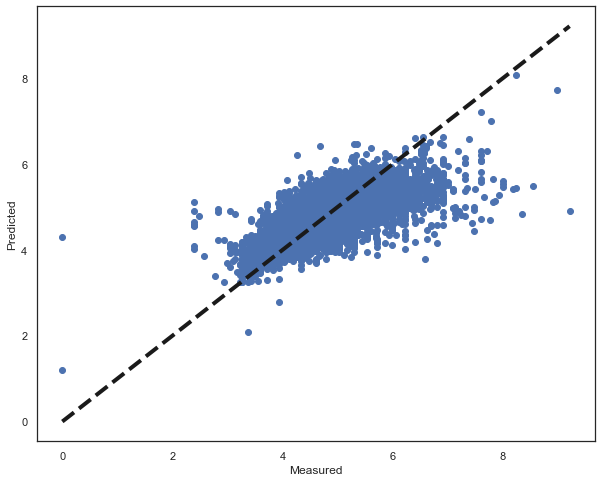

In [ ]:
ActVPred = AlgoFun (X_train, Y_train, X_test, Y_test, 'RFR', 'Analog')

# 16. Final Conclusion

Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

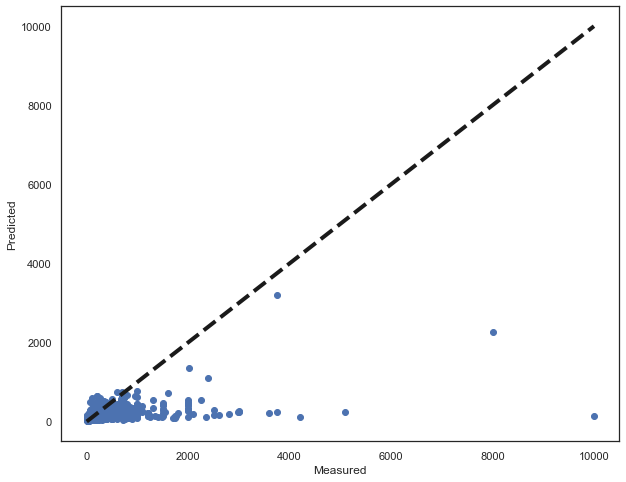

In [ ]:
Y_test1 = ActVPred['Actual'] = np.exp(ActVPred['Actual'])-1
Y_pred1 = ActVPred['Predicted'] = np.exp(ActVPred['Predicted'])-1

fig, ax = plt.subplots()
minimum = min (Y_test1.min(), Y_pred1.min())
maximum = max (Y_test1.max(), Y_pred1.max())
ax.scatter(Y_test1, Y_pred1)
ax.plot([minimum, maximum], [minimum, maximum], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
filename = 'Plot.jpg'
plt.savefig("Final" + filename)
plt.show()

ActVPred.to_csv('Final Submission.csv')